In [9]:
import cv2
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [14]:

def cutImage(event, x, y, flags, params):
    
    thickness = 2
    if event == cv2.EVENT_LBUTTONDOWN:
        start_pt = [x, y]
        crop = True
        
    elif event == cv2.EVENT_LBUTTONUP:
        end_pt = [x, y]
        crop = False
        
        cv2.rectangle(image, start_pt, end_pt, (255, 0, 0), thickness)
        cv2.imshow('image', image)


def GMMPrediction(image, num_components = 4):
    '''
    Function to cluster images sections using gaussian mixture models
    
    Input:
        image - H x W x 3 - rgb image
        num_components - scalar - number of gaussian components
    Returns:
        image_prediction - H x W - clustered image
        image_visualization - H x W - clustered image to visualize
        
    '''
    image_vector = image.reshape((-1, 3))
    gmm_model = sklearn.mixture.GaussianMixture(n_components = num_components).fit(image_vector)
    labels = gmm_model.predict(image_vector)
    
    image_prediction = labels.reshape((image.shape[0], image.shape[1]))
    image_visualization = image_prediction * 255
    
    return image_prediction, image_visualization
    

In [15]:
if __name__ == "__main__":
    
    
    image_name = './data/images/person6.jpg'
    bbox_name = './data/bboxes/person6.txt'
    bbox = np.loadtxt(bbox_name, delimiter = ' ')
    print(bbox)
    image = cv2.imread(image_name)
    copy_image = image.copy()
    # cv2.namedWindow('image')
    # cv2.setMouseCallback('image', cutImage)

    # while True:

    #     cv2.imshow('image', image)
    #     key = cv2.waitKey(1) & 0xFF
    
    # cropped_image = 
        
    

[129. 112. 314. 532.]


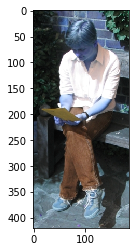

In [16]:
    cropped_image = image[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
    plt.imshow(cropped_image, cmap = 'gray')

### GMM prediction

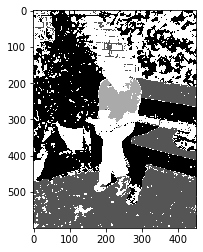

In [24]:
    n_components = 4
    image_predicted, image_visualization = GMMPrediction(image, n_components)
    plt.imshow(image_visualization,cmap = 'gray')